The purpose of this notebook is to identify problems I have with the token-replay
implementation of pm4py - focusing specificly on the outputs of the
`tokenreplay.variants.token_replay.apply_trace` method.

Pickles of the genomes are also saved in this folder.

In [3]:
# %%
from neat import params, genome, initial_population

import pm4py
from pm4py.stats import get_variants
from pm4py.algo.conformance.tokenreplay.variants.token_replay import apply as get_replayed_traces
from pm4py.objects.petri_net.obj import PetriNet as pn

from pprint import pprint
from IPython.display import display
import pickle

params.load('../params/testing/test_params.json')
log = pm4py.read_xes("../pm_data/running_example.xes")
log

# path = "E:/migrate_o/github_repos/EvolvePetriNets/results/data/bs_oops_now_actual_perc_fit_tr_06-25-2024_15-30-29/whatever/1_06-25-2024_15-30-36/reports/best_genome.pkl"
# path = "E:/migrate_o/github_repos/EvolvePetriNets/results/data/bs__perc_fit_tr_gen_prec_06-25-2024_15-59-21/whatever/1_06-25-2024_15-59-31/reports/best_genome.pkl"

def load_genome(path):
    with open(path, 'rb') as file:
        g: genome.GeneticNet = pickle.load(file)
    g.clear_cache()
    g.evaluate_fitness(log)
    return g

def show_genome(g: genome.GeneticNet):
    display(g.get_gviz())

def print_aligned_traces(g: genome.GeneticNet, log):
    default_params = {"show_progress_bar": False}
    g.clear_cache()
    net, im, fm = g.build_petri()
    aligned_traces = get_replayed_traces(log, net, im, fm, default_params)
    pprint(aligned_traces)

def print_variants(log):
    for variant in get_variants(log):
        print(' -> '.join(variant))


print("the variants of the log are:")
print_variants(log)


parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1199.51it/s]

the variants of the log are:
register request -> examine thoroughly -> check ticket -> decide -> reject request
register request -> check ticket -> examine casually -> decide -> pay compensation
register request -> examine casually -> check ticket -> decide -> reinitiate request -> examine thoroughly -> check ticket -> decide -> pay compensation
register request -> check ticket -> examine thoroughly -> decide -> reject request
register request -> examine casually -> check ticket -> decide -> reinitiate request -> check ticket -> examine casually -> decide -> reinitiate request -> examine casually -> check ticket -> decide -> reject request
register request -> examine casually -> check ticket -> decide -> pay compensation


## Broken net that tricks TBR

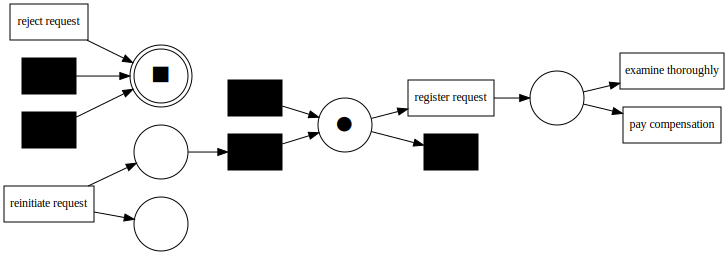

[{'activated_transitions': [(register request, 'register request'),
                            (examine thoroughly, 'examine thoroughly'),
                            (reject request, 'reject request')],
  'consumed_tokens': 3,
  'enabled_transitions_in_marking': {(reject request, 'reject request'),
                                     (a9b4dd75-7b9c-4a97-859d-5923a4a3f989, 'a9b4dd75-7b9c-4a97-859d-5923a4a3f989'),
                                     (6b50f90f-982d-4df7-bcf7-2901d914d5df, '6b50f90f-982d-4df7-bcf7-2901d914d5df'),
                                     (reinitiate request, 'reinitiate request'),
                                     (c04d0fb7-3065-4645-a4b2-14caa1568e2a, 'c04d0fb7-3065-4645-a4b2-14caa1568e2a')},
  'missing_tokens': 0,
  'produced_tokens': 3,
  'reached_marking': ['end:1'],
  'remaining_tokens': 0,
  'trace_fitness': 1.0,
  'trace_is_fit': True,
  'transitions_with_problems': []},
 {'activated_transitions': [(register request, 'register request'),
         

In [4]:
# %%
g1 = load_genome("./tool_scripts/tbr_output_analysis/not_all_tasks.pkl")
show_genome(g1)
print_aligned_traces(g1, log)



Issues:
* the first trace omits 2 tasks and somehow gets full fitness??
    * also in the first trace, it should not be possible to activate the reject request transition.

## Alpha Algo mined model

E:\migrate_o\github_repos\pm4py-core\pm4py\algo\analysis\woflan\place_invariants\utility.py:153: UserWarning: solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.
  warnings.warn("solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.")


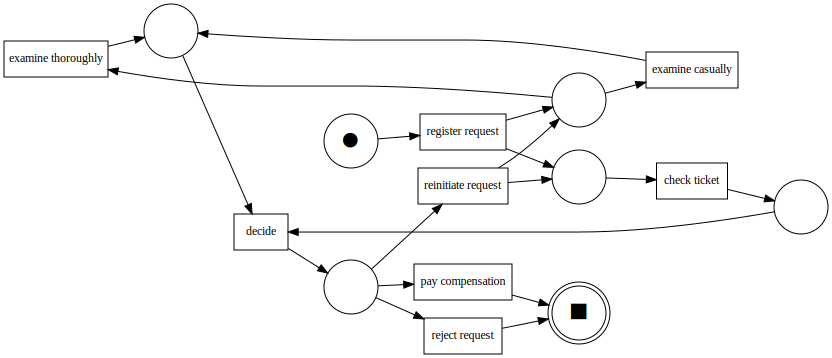

[{'activated_transitions': [(register request, 'register request'),
                            (examine thoroughly, 'examine thoroughly'),
                            (check ticket, 'check ticket'),
                            (decide, 'decide'),
                            (reject request, 'reject request')],
  'consumed_tokens': 7,
  'enabled_transitions_in_marking': set(),
  'missing_tokens': 0,
  'produced_tokens': 7,
  'reached_marking': ['end:1'],
  'remaining_tokens': 0,
  'trace_fitness': 1.0,
  'trace_is_fit': True,
  'transitions_with_problems': []},
 {'activated_transitions': [(register request, 'register request'),
                            (check ticket, 'check ticket'),
                            (examine casually, 'examine casually'),
                            (decide, 'decide'),
                            (pay compensation, 'pay compensation')],
  'consumed_tokens': 7,
  'enabled_transitions_in_marking': set(),
  'missing_tokens': 0,
  'produced_tokens': 7,
  're

In [6]:
# %%
g1 = load_genome("./tool_scripts/tbr_output_analysis/alpha_bootstrap.pkl")
show_genome(g1)
print_aligned_traces(g1, log)

